In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
# path = '/home/gil/Telecos/3B/APA/LAB/Competition/data/ML-MATT-CompetitionQT2021_train.csv'
# data = pd.read_csv(path, delimiter=';')
# print(data.head())

from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/APA/Competition/data/ML-MATT-CompetitionQT2021_train.csv'
data = pd.read_csv(file_path, delimiter=';')
print(data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
    Time CellName  PRBUsageUL  PRBUsageDL  meanThr_DL  meanThr_UL  maxThr_DL  \
0  10:45    3BLTE     12.3848      1.4019      0.3927      0.0438    16.6522   
1   9:45    1BLTE     22.0438      2.0016      0.5620      0.2697    10.3994   
2   7:45    9BLTE      0.5105      0.4258      0.0152      0.0106     0.2755   
3   2:45    4ALTE      1.9963      1.1513      0.9908      0.0245    64.7465   
4   3:30   10BLTE      0.3030      0.4040      0.0160      0.0130     0.3480   

   maxThr_UL  meanUE_DL  meanUE_UL  maxUE_DL  maxUE_UL  maxUE_UL+DL  Unusual  
0     0.6806     1.1293     1.0491         5         3            8        1  
1     1.1771     1.4480     1.1630         6         5           11        1  
2     0.1685     1.0379     1.0535         1         2            3        1  
3     0.8747     1.0766     1.0526         3         2            5       

In [20]:
unusual_counts = data['Unusual'].value_counts()

percentage_1 = (unusual_counts[1] / len(data)) * 100
percentage_0 = (unusual_counts[0] / len(data)) * 100

print("Percentage of 1s:", percentage_1)
print("Percentage of 0s:", percentage_0)

Percentage of 1s: 27.593214827660955
Percentage of 0s: 72.40678517233904


Here we are going to transform the `Time` column to minutes, to cuantify this row. Also we are going to eliminate the `CellName`, with the hypothesis that it has no correlation with the `Unusual` column.

In [13]:
#  Remove the column named 'CellName'
data = data.drop(columns=['CellName'])

# Split 'Time' column into hours and minutes
time_parts = data['Time'].str.split(':', expand=True).astype(int)
seconds_since_midnight = (time_parts[0] * 60) + time_parts[1]
data['Time'] = seconds_since_midnight

print(data.head)



<bound method NDFrame.head of        Time  PRBUsageUL  PRBUsageDL  meanThr_DL  meanThr_UL  maxThr_DL  \
0       645     12.3848      1.4019      0.3927      0.0438    16.6522   
1       585     22.0438      2.0016      0.5620      0.2697    10.3994   
2       465      0.5105      0.4258      0.0152      0.0106     0.2755   
3       165      1.9963      1.1513      0.9908      0.0245    64.7465   
4       210      0.3030      0.4040      0.0160      0.0130     0.3480   
...     ...         ...         ...         ...         ...        ...   
36899  1290      7.5790      0.8080      0.1640      0.0370     7.9800   
36900   585      9.0950      1.2130      0.1890      0.0300    19.5100   
36901   810      4.5128      0.9309      0.3475      0.0311    12.6148   
36902   750     13.3390      2.7280      0.5590      0.0650    28.1870   
36903   945     22.2310      2.6270      0.8140      0.0760    80.8040   

       maxThr_UL  meanUE_DL  meanUE_UL  maxUE_DL  maxUE_UL  maxUE_UL+DL  \
0   

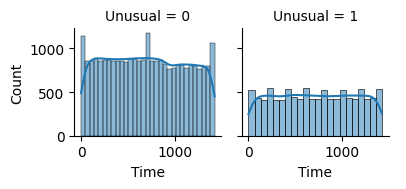

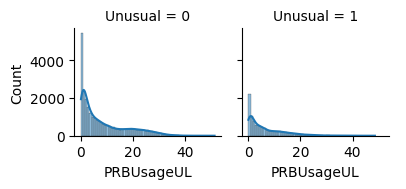

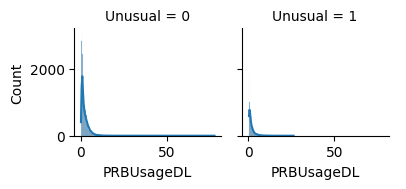

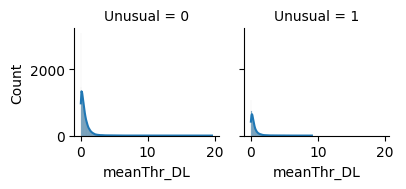

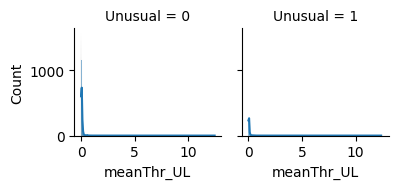

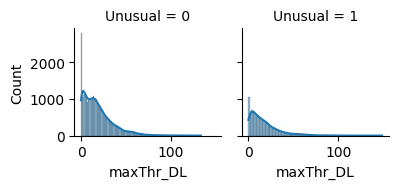

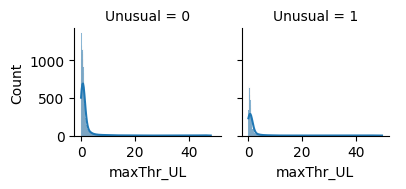

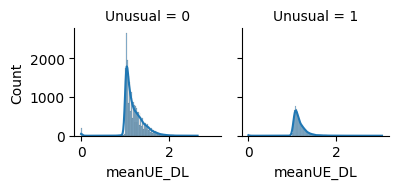

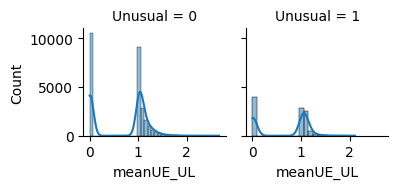

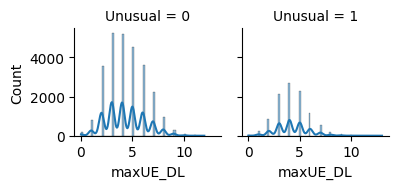

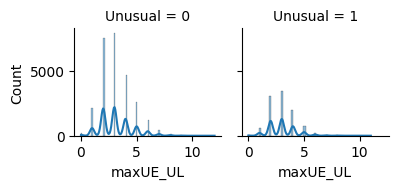

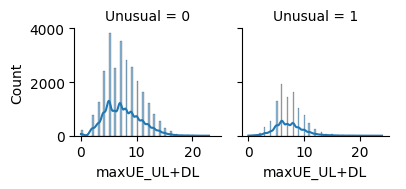

In [14]:
for idx, feature in enumerate(list(data.columns)[:-1]):
    fg = sns.FacetGrid(data, col='Unusual', height=2)
    fg.map(sns.histplot, feature, kde=True).add_legend()
plt.show()

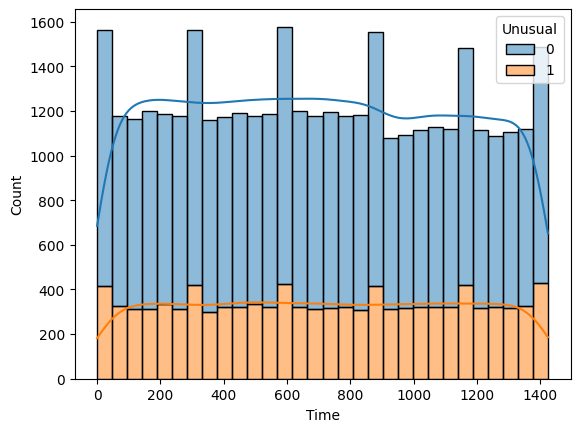

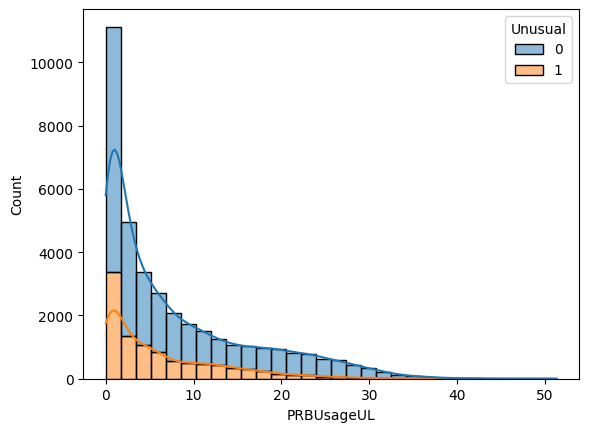

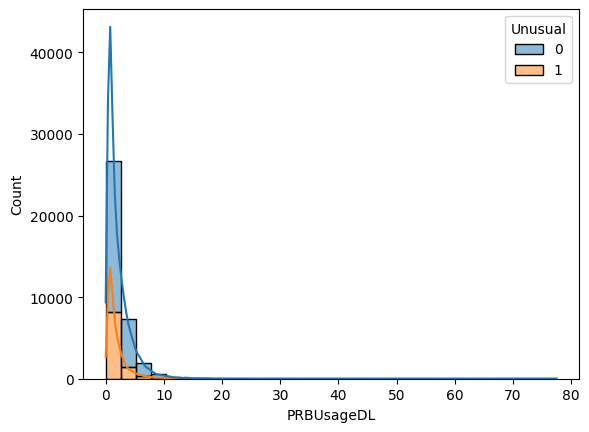

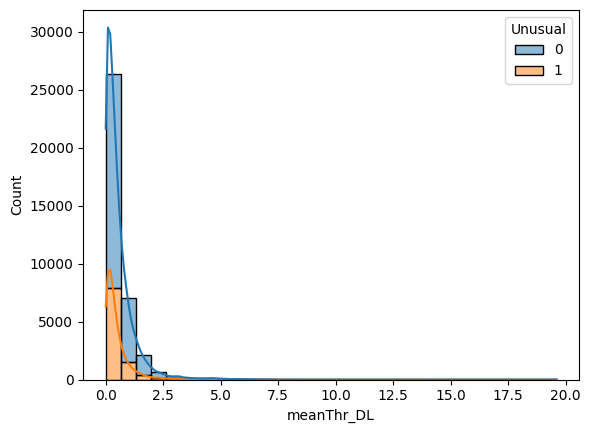

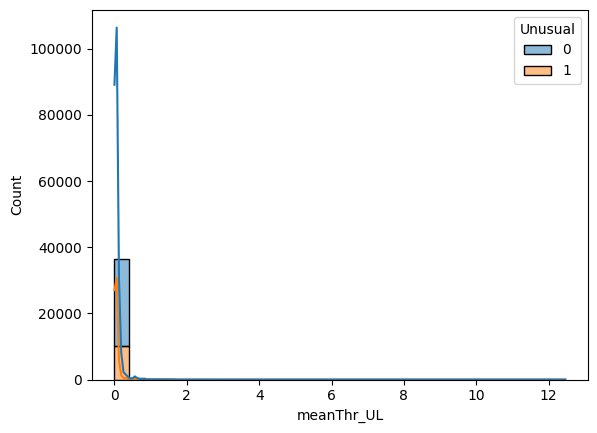

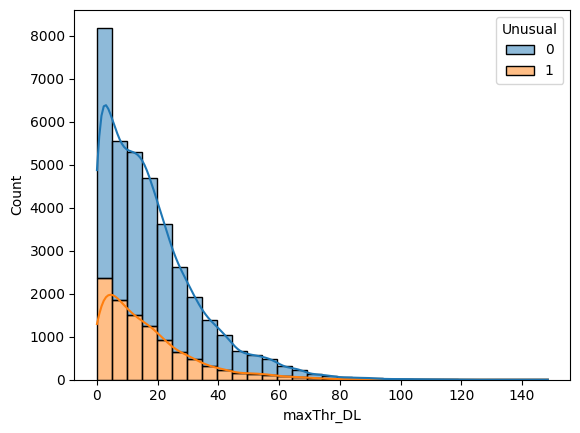

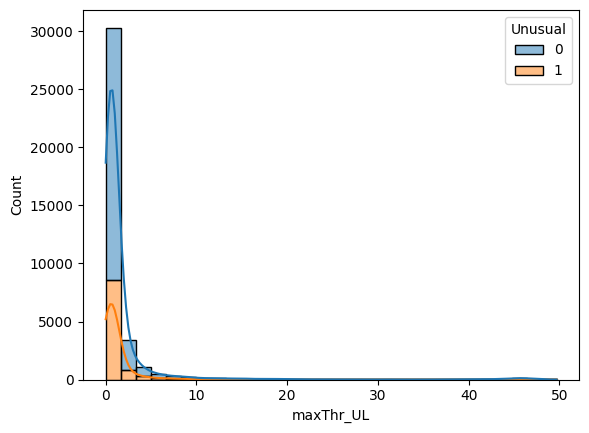

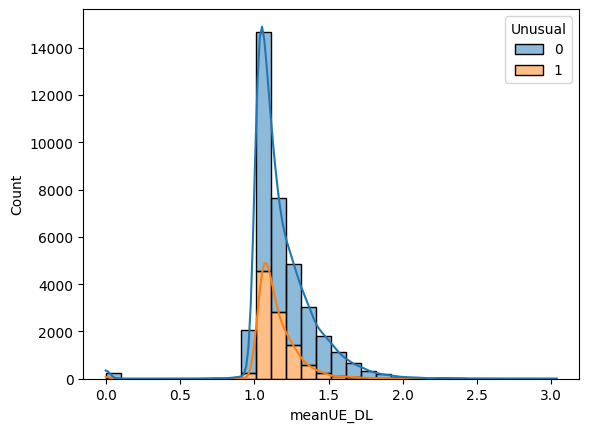

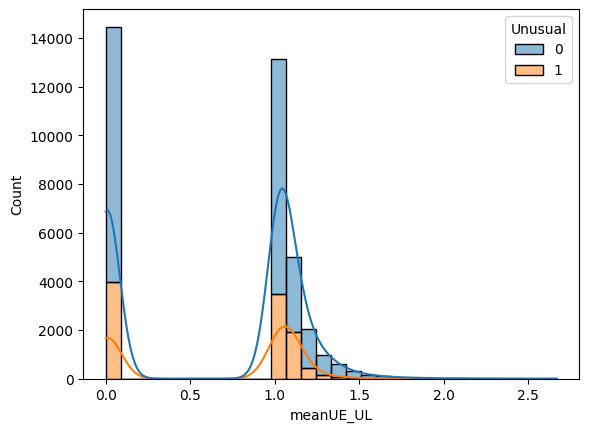

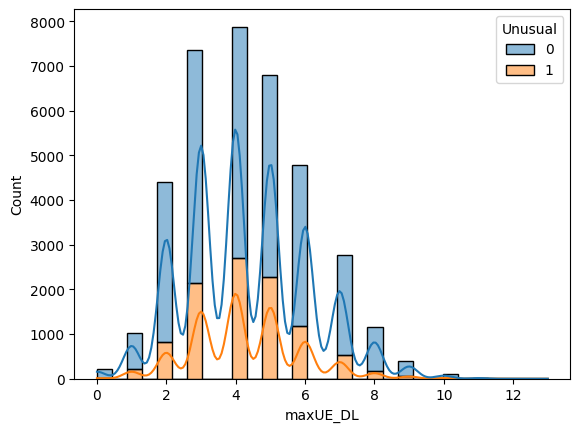

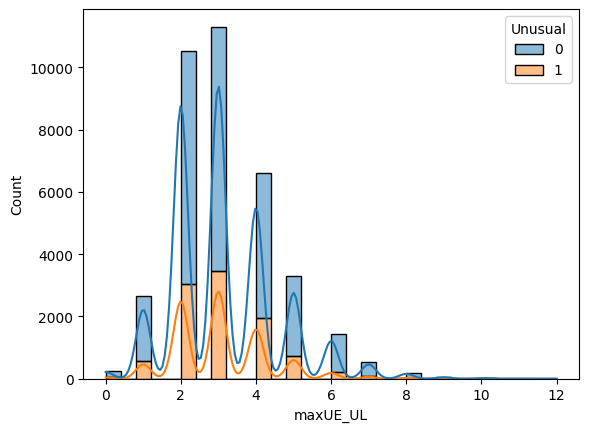

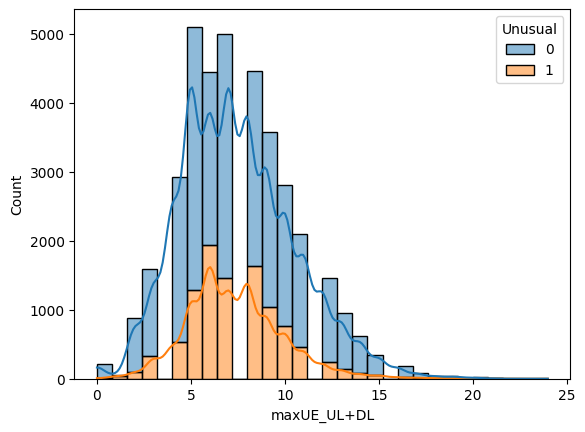

In [15]:
for idx, feature in enumerate(list(data.columns)[:-1]):
    sns.histplot(data=data, x=feature, hue="Unusual",kde=True, bins=30, multiple="stack")
    plt.show()

In [16]:
sns.pairplot(data, hue="Unusual")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

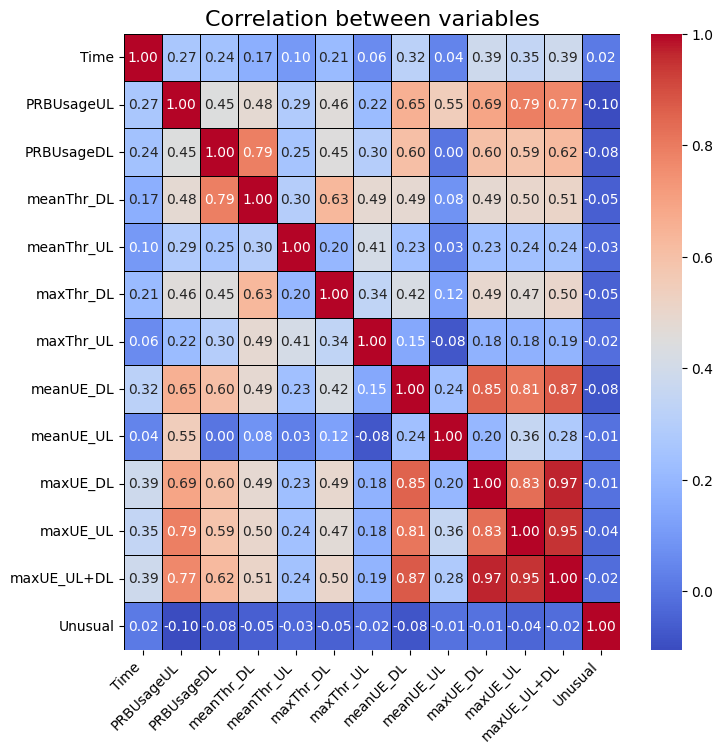

In [18]:
fig, ax = plt.subplots(figsize=(8, 8))
heatmap = sns.heatmap(data.corr(),
                      annot=True,
                      linewidths=.5,
                      linecolor='black',
                      cmap='coolwarm',
                      fmt=".2f")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.title("Correlation between variables", fontsize=16)
plt.show()

Here we are going to analyse if the name of the cell has correlation with the unusual value. We are separeting the number with the letter, to see it independently.

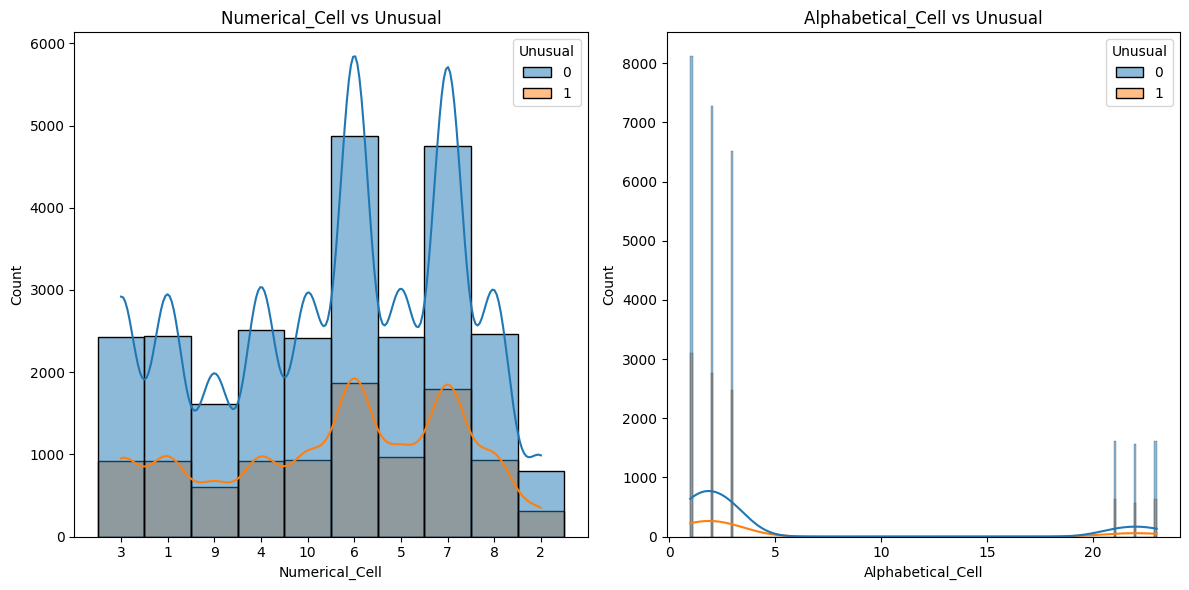

In [ ]:
data['Numerical_Cell'] = data['CellName'].str.extract('(\d+)')
data['Alphabetical_Cell'] = data['CellName'].str.extract('([a-zA-Z])')

data['Alphabetical_Cell'] = data['Alphabetical_Cell'].apply(lambda x: ord(x.lower()) - 96)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=data, x='Numerical_Cell', hue='Unusual', kde=True)
plt.title('Numerical_Cell vs Unusual')

plt.subplot(1, 2, 2)
sns.histplot(data=data, x='Alphabetical_Cell', hue='Unusual', kde=True)
plt.title('Alphabetical_Cell vs Unusual')

plt.tight_layout()
plt.show()